In [1]:
# import all necessary packages

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns

from scipy.stats import zscore
from sklearn.model_selection import train_test_split

# Predict medical expenses using linear regression

Data Info -
#age: An integer indicating the age of the primary beneficiary
#sex: The policy holder's gender, either male or female.
#bmi: The body mass index (BMI), which provides a sense of how over- or under-weight a person is relative to their height
#children: An integer indicating the number of children/dependents covered by the insurance plan.
#smoker: A yes or no categorical variable that indicates whether the insured regularly smokes tobacco.
#region: The beneficiary's place of residence in the US


# Question 1- Get the data.



The data is given in Olympus with the name insurance.csv. You need to load the data with the help of pandas.

In [2]:
import pandas as pd

# load the dataset
ins_df = pd.read_csv("insurance.csv")
ins_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
ins_df.shape

(1338, 7)

In [4]:
# check for missing values if any
ins_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
# observe the datatype of each columns
ins_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

# Question 2 - Check the distribution of expenses(charges) and state your insights.

In [6]:
#Lets analysze the distribution of expenses(charges)
ins_df["charges"].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [7]:
# 'charges' distribution analysis:
# 1. mean and median have big difference of around 4000..
# 2. difference between Max and Q3 is very high compare to diffence between Q1 and Min... 
#    this indicate data is skewed more towards rigth tail..

# Question 3 - Explore the relationship between variables. 

You can use corr() function or any other function to do the same.

C:\Users\birender.panwar\AppData\Local\conda\conda\envs\glbase\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


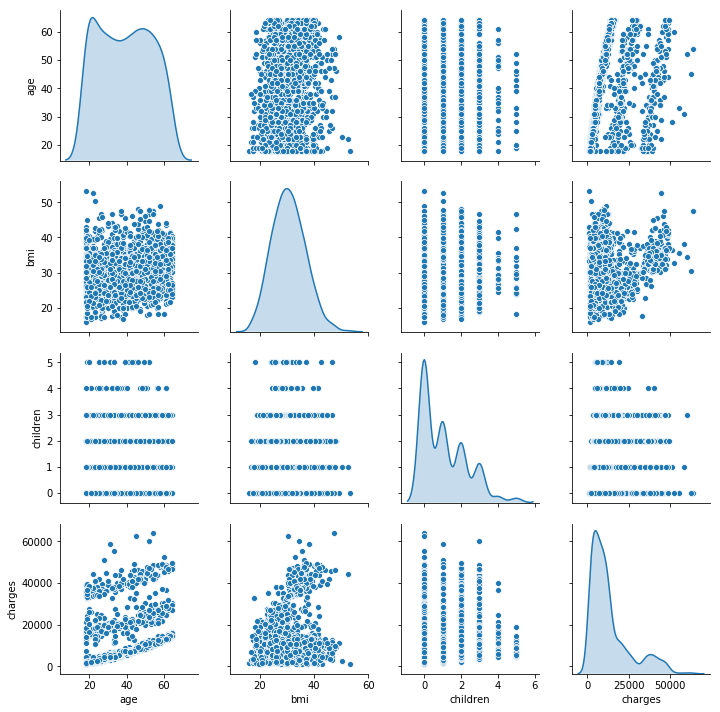

In [8]:
# we can use pairplot to analyse the correlation among different dimensions and also each dimension with the dependent dimension
# pairplot creates a dashboard reflecting useful information about the dimensions

sns.pairplot(ins_df, diag_kind='kde')   # to plot density curve instead of histogram

# Question 4 - Use charges as dependent feature and Get the train and test data from your dataset.

In [9]:
# Copy all the predictor variables into X dataframe. Since 'charges' is dependent variable drop it
X = ins_df.drop('charges', axis=1)

# Copy the 'charges' column alone into the y dataframe. This is the dependent variable
y = ins_df[['charges']]

In [10]:
# get train and test data(train 80%, test 20%)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=1)

# Question 5 - Create the dummies for the categorical variables/features for both train and test independent data.

You can use pd.get_dummies() function to do so.

In [11]:
# 'sex','smoker','region' are categorical variables in the dataset
# Convert categorical variable into dummy/indicator variables. As many columns will be created as distinct values using one hot coding
X_train = pd.get_dummies(X_train, columns=['sex','smoker','region'])
X_test = pd.get_dummies(X_test, columns=['sex','smoker','region'])

In [12]:
X_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
216,53,26.600,0,1,0,1,0,0,1,0,0
731,53,21.400,1,0,1,1,0,0,0,0,1
866,18,37.290,0,0,1,1,0,0,0,1,0
202,60,24.035,0,1,0,1,0,0,1,0,0
820,45,33.700,1,0,1,1,0,0,0,0,1


In [13]:
X_test.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
559,19,35.53,0,0,1,1,0,0,1,0,0
1087,57,31.54,0,0,1,1,0,0,1,0,0
1020,51,37.00,0,0,1,1,0,0,0,0,1
460,49,36.63,3,1,0,1,0,0,0,1,0
802,21,22.30,1,0,1,1,0,0,0,0,1


# Question 6 - Train your model.

In [14]:
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# invoke the LinearRegression function and find the bestfit model on training data
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
linear_reg_model.score(X_test, y_test)

0.7623311844057112

# Question 7 - Fit your model and get the summary of model. Print the coefficients.

In [16]:
# Using Statsmodel library to get R type output and summary
import statsmodels.formula.api as smf

# This library expects the X and Y to be given in one single dataframe
data_train = pd.concat([X_train, y_train], axis=1)

lm1 = smf.ols(formula= 'charges ~ age+bmi+children+sex_female+sex_male+smoker_no+smoker_yes+region_northeast+region_northwest+region_southeast+region_southwest', data = data_train).fit()
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     393.2
Date:                Sat, 26 Jan 2019   Prob (F-statistic):          4.76e-311
Time:                        18:24:01   Log-Likelihood:                -10838.
No. Observations:                1070   AIC:                         2.169e+04
Df Residuals:                    1061   BIC:                         2.174e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -48.8088    482.333  

In [17]:
# coefficients for each of the independent attributes
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, linear_reg_model.coef_[0][idx]))
    
# intercept for the model
intercept = linear_reg_model.intercept_[0]
print("\nThe intercept for our model is {}".format(intercept))

The coefficient for age is 257.4902466901149
The coefficient for bmi is 321.6218927794265
The coefficient for children is 408.0610200118781
The coefficient for sex_female is 121.07653279582122
The coefficient for sex_male is -121.07653279582284
The coefficient for smoker_no is -11893.243022680836
The coefficient for smoker_yes is 11893.243022680828
The coefficient for region_northeast is 584.3763627452171
The coefficient for region_northwest is 188.27979919474546
The coefficient for region_southeast is -453.9995169054855
The coefficient for region_southwest is -318.65664503447834

The intercept for our model is -109.81988139964778


# Question 8 - Predict the charges for test data and evaluate the model performance. 

You can get the values of MAE, MSE, RMSE to show the evaluation parameters of your model

In [18]:
import math

# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases

# predict charges for a set of attributes in the test set
y_pred = linear_reg_model.predict(X_test)
mse = np.mean((y_pred-y_test)**2)
rmse = math.sqrt(mse)
print("RMSE : %0.4f" %(rmse))

RMSE : 5956.4547


In [19]:
# Analysis: so there is avg of 6000 (roundoff) difference from real 'charges' on an avg

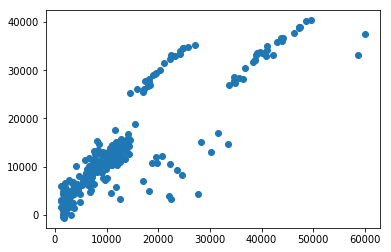

In [20]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading
plt.scatter(y_test['charges'], y_pred)

# Naive Bayes with IRIS Data

# Question 9 - Import Iris dataset from Sklear lib and slice the data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

#### **Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

In [21]:
import sklearn.datasets as dataset

# Import Iris dataset from Sklear lib
iris = dataset.load_iris()

In [22]:
# get independent data in X as dataframe
X = pd.DataFrame(data=iris.data,columns = iris.feature_names)
print("Shape: ", X.shape)
X.head()

Shape:  (150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
# get dependent data in Y as dataframe
y = pd.DataFrame(data=iris.target,columns=['class'])
print("Shape: ", y.shape)
y.head()

Shape:  (150, 1)


,class
0,0
1,0
2,0
3,0
4,0


## Question 10 - Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

C:\Users\birender.panwar\AppData\Local\conda\conda\envs\glbase\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


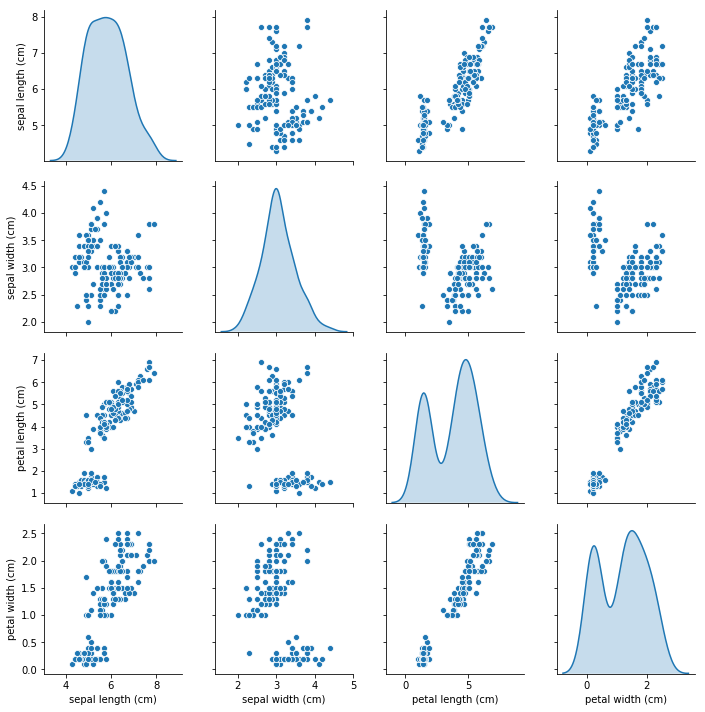

In [24]:
# plor scatter matrix using pairplot
sns.pairplot(X, diag_kind='kde')  # to plot density curve instead of histogram

## Question 11- Do Feature Scaling 

In [25]:
from scipy.stats import zscore

# we perform z-score scaling
X  = X.apply(zscore)
X.shape

(150, 4)

## Question 12- Train and Fit NaiveBayes Model

In [26]:
from sklearn.naive_bayes import GaussianNB

# get train and test data(train 80%, test 20%)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=1)

# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

C:\Users\birender.panwar\AppData\Local\conda\conda\envs\glbase\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

## Question 13 - Print Accuracy and Confusion Matrix and Conclude your findings

In [27]:
# performance on test data
accuracy = nb_model.score(X_test , y_test)
print("GaussianNB: Accuracy: ", accuracy)

GaussianNB: Accuracy:  0.9666666666666667


In [28]:
from sklearn import metrics

y_pred = nb_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

   micro avg       0.97      0.97      0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [29]:
# Finding (in test samples of 30)
# 1. 'setosa' is classified correctly all the times
# 2. 'versicolor' is classified correctly 12 out of 13 .. only one time it is classified in-correctly
# 3. 'setosa' is classified correctly all the times

# Ensemble Methods

## Question 14-  Apply the Random forest model and print the accuracy of Random forest Model


In [30]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

C:\Users\birender.panwar\AppData\Local\conda\conda\envs\glbase\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\birender.panwar\AppData\Local\conda\conda\envs\glbase\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
# performance on test data
accuracy = rf_model.score(X_test , y_test) 
print("RandomForestClassifier: Accuracy: ", accuracy)

RandomForestClassifier: Accuracy:  0.9666666666666667


## Question 15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

C:\Users\birender.panwar\AppData\Local\conda\conda\envs\glbase\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [33]:
# performance on test data
accuracy = gb_model.score(X_test , y_test) 
print("GradientBoostingClassifier: Accuracy: ", accuracy)

GradientBoostingClassifier: Accuracy:  0.9666666666666667
